<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/PART_3_Hierarchical_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

#Data Loading

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')

In [132]:
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


In [133]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [135]:
df.isnull().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [136]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [137]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

#Data cleaning and preprocessing

In [138]:
# Replace missing values with median for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical variables if needed
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [139]:
# Group by region to get regional characteristics
region_data = df.groupby('Region').agg({
    'Total Household Income': 'mean',
    'Total Food Expenditure': 'mean',
    'Bread and Cereals Expenditure': 'mean',
    'Total Rice Expenditure': 'mean',
    'Meat Expenditure': 'mean',
    'Fruit Expenditure': 'mean',
    'Vegetables Expenditure': 'mean',
    'Restaurant and hotels Expenditure': 'mean',
    'Alcoholic Beverages Expenditure': 'mean',
    'Tobacco Expenditure': 'mean',
    'Clothing, Footwear and Other Wear Expenditure': 'mean',
    'Housing and water Expenditure': 'mean',
    'Imputed House Rental Value': 'mean',
    'Medical Care Expenditure': 'mean',
    'Transportation Expenditure': 'mean',
    'Communication Expenditure': 'mean',
    'Education Expenditure': 'mean',
    'Miscellaneous Goods and Services Expenditure': 'mean',
    'Special Occasions Expenditure': 'mean',
    'Total Income from Entrepreneurial Acitivites': 'mean'
}).reset_index()

print("\nGrouped Data by Region:")
print(region_data.head())


Grouped Data by Region:
                Region  Total Household Income  Total Food Expenditure  \
0                 ARMM           134746.817616            64931.270463   
1                  CAR           269540.484638            80352.780290   
2               Caraga           196907.376543            71912.659933   
3    I - Ilocos Region           238110.084327            80649.937819   
4  II - Cagayan Valley           236778.221721            75604.358269   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                   25933.379448            20108.128114       2255.032473   
1                   26666.110145            20975.441159      12220.992464   
2                   26698.882155            20369.699214       8046.477553   
3                   22724.907155            17439.663543      11827.419080   
4                   21411.527715            16563.448851      12307.674178   

   Fruit Expenditure  Vegetables Expenditure  \
0        2589

In [140]:
# Handle outliers using IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

In [141]:
# Apply outlier handling to income and expenditure columns
income_expenditure_cols = [col for col in region_data.columns if col != 'Region']
region_data = handle_outliers(region_data, income_expenditure_cols)

In [142]:
# Normalize the data
X = region_data.drop('Region', axis=1)
regions = region_data['Region'].values
feature_names = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA

In [143]:
# Apply PCA
# First, determine optimal number of components
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

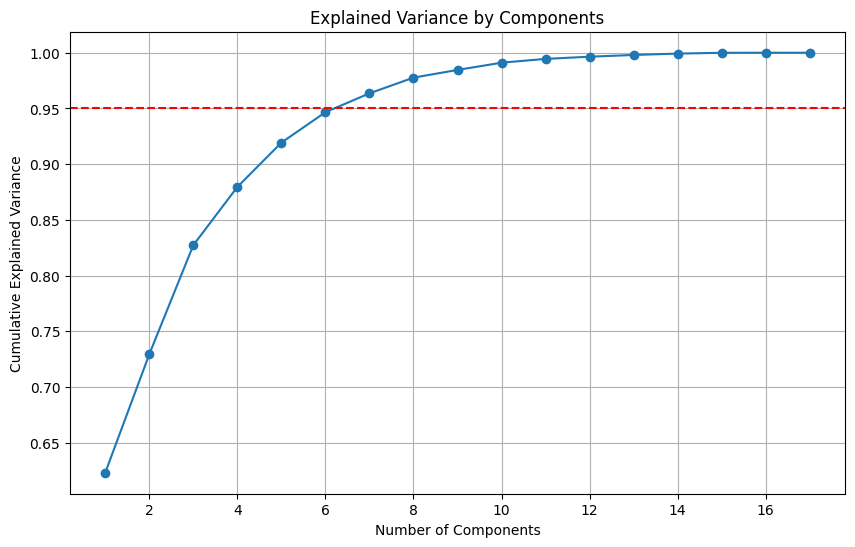

In [144]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [145]:
# Select number of components that explain at least 95% variance
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nNumber of PCA components selected: {n_components}")


Number of PCA components selected: 7


In [146]:
# Apply PCA with selected components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [147]:
# Display the component loadings
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=feature_names
)
print("\nPCA Component Loadings:")
print(loadings)


PCA Component Loadings:
                                                    PC1       PC2       PC3  \
Total Household Income                         1.000460 -0.053044 -0.065358   
Total Food Expenditure                         0.967494  0.079192 -0.023797   
Bread and Cereals Expenditure                 -0.221428  0.439750  0.849548   
Total Rice Expenditure                        -0.322456  0.602556  0.507282   
Meat Expenditure                               0.978069  0.019074 -0.144471   
Fruit Expenditure                              0.608047  0.617566  0.173674   
Vegetables Expenditure                         0.484596  0.730617 -0.274088   
Restaurant and hotels Expenditure              0.944629 -0.100023 -0.217864   
Alcoholic Beverages Expenditure                0.484024 -0.146503 -0.239124   
Tobacco Expenditure                            0.674546  0.028913 -0.156789   
Clothing, Footwear and Other Wear Expenditure  0.913659 -0.018596  0.165181   
Housing and water Expenditu

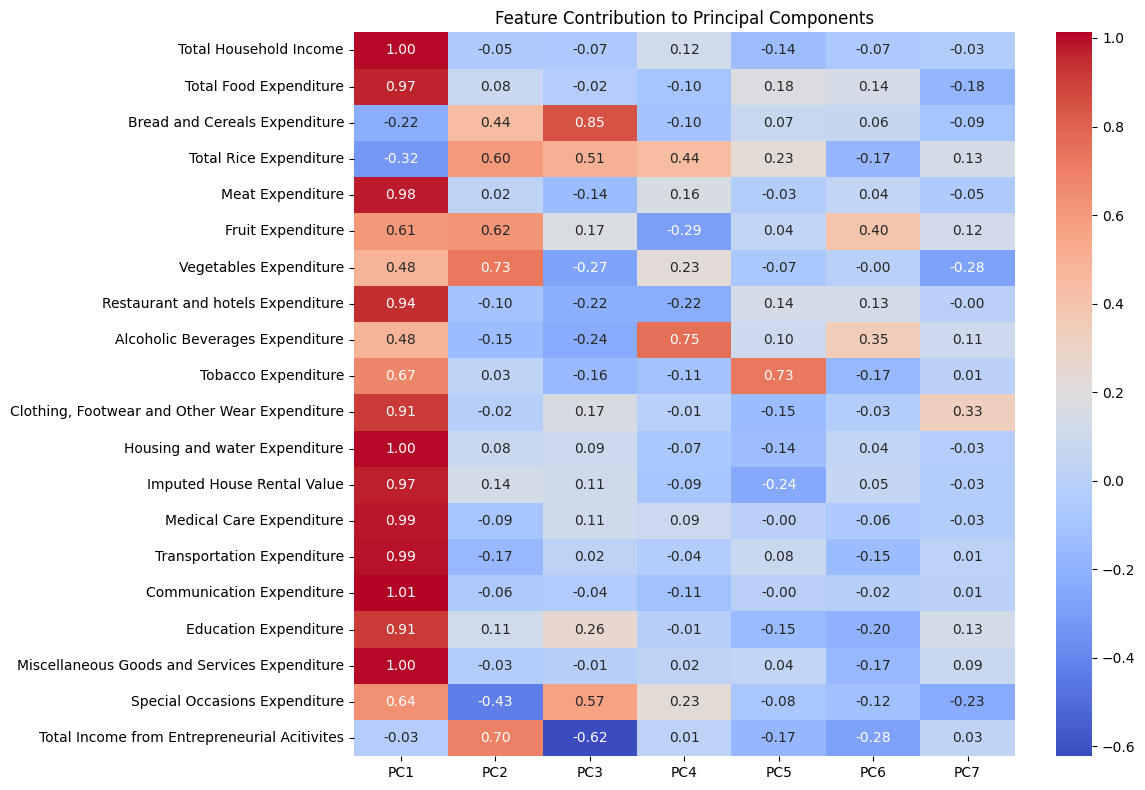

In [148]:
# Visualize feature contribution to principal components
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Contribution to Principal Components')
plt.tight_layout()
plt.show()

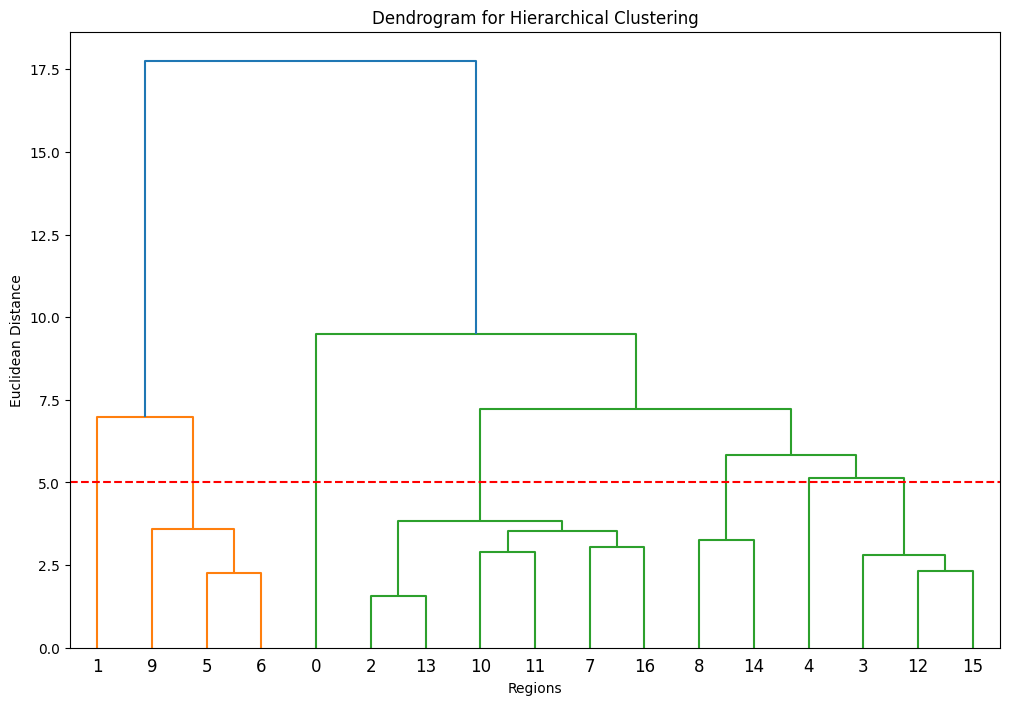

In [149]:
# Determine optimal number of clusters using dendrogram
plt.figure(figsize=(12, 8))
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Regions')
plt.ylabel('Euclidean Distance')
plt.axhline(y=5, color='r', linestyle='--')  # Example threshold
plt.show()

#Hierachical Clustering

In [150]:
# Try different numbers of clusters and evaluate silhouette scores
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.436
For n_clusters = 3, the silhouette score is 0.377
For n_clusters = 4, the silhouette score is 0.227
For n_clusters = 5, the silhouette score is 0.226
For n_clusters = 6, the silhouette score is 0.245
For n_clusters = 7, the silhouette score is 0.235
For n_clusters = 8, the silhouette score is 0.204
For n_clusters = 9, the silhouette score is 0.153


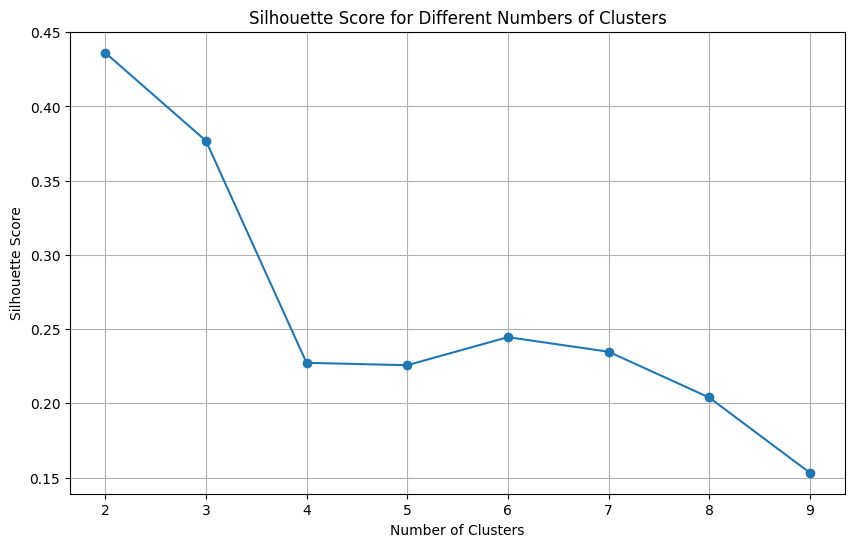

In [151]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

In [152]:
# Select optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")
print(f"Silhouette score: {max(silhouette_scores):.3f}")

Optimal number of clusters: 2
Silhouette score: 0.436


In [153]:
# Apply hierarchical clustering with optimal number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
y_hc = hc.fit_predict(X_pca)

In [154]:
# Add cluster labels to the data
region_data['Cluster'] = y_hc

In [155]:
# Analyze clusters
print("\nCluster Distribution:")
print(region_data['Cluster'].value_counts())


Cluster Distribution:
Cluster
0    13
1     4
Name: count, dtype: int64


In [156]:
# Calculate summary statistics for each cluster
cluster_summary = region_data.groupby('Cluster').agg({
    'Total Household Income': ['mean', 'median', 'std'],
    'Total Food Expenditure': ['mean', 'median', 'std'],
    'Housing and water Expenditure': ['mean', 'median', 'std'],
    'Education Expenditure': ['mean', 'median', 'std'],
    'Transportation Expenditure': ['mean', 'median', 'std'],
    'Medical Care Expenditure': ['mean', 'median', 'std']
})

print("\nCluster Summary Statistics:")
print(cluster_summary)


Cluster Summary Statistics:
        Total Household Income                               \
                          mean         median           std   
Cluster                                                       
0                206739.973449  214057.779544  29753.417017   
1                290718.844820  296575.019073  14523.311414   

        Total Food Expenditure                             \
                          mean        median          std   
Cluster                                                     
0                 73943.307022  71912.659933  6337.439829   
1                 92595.853061  96676.877318  8162.048514   

        Housing and water Expenditure                             \
                                 mean        median          std   
Cluster                                                            
0                        27375.981991  27280.120668  5326.850797   
1                        48470.103522  46831.519103  5898.820155   

        

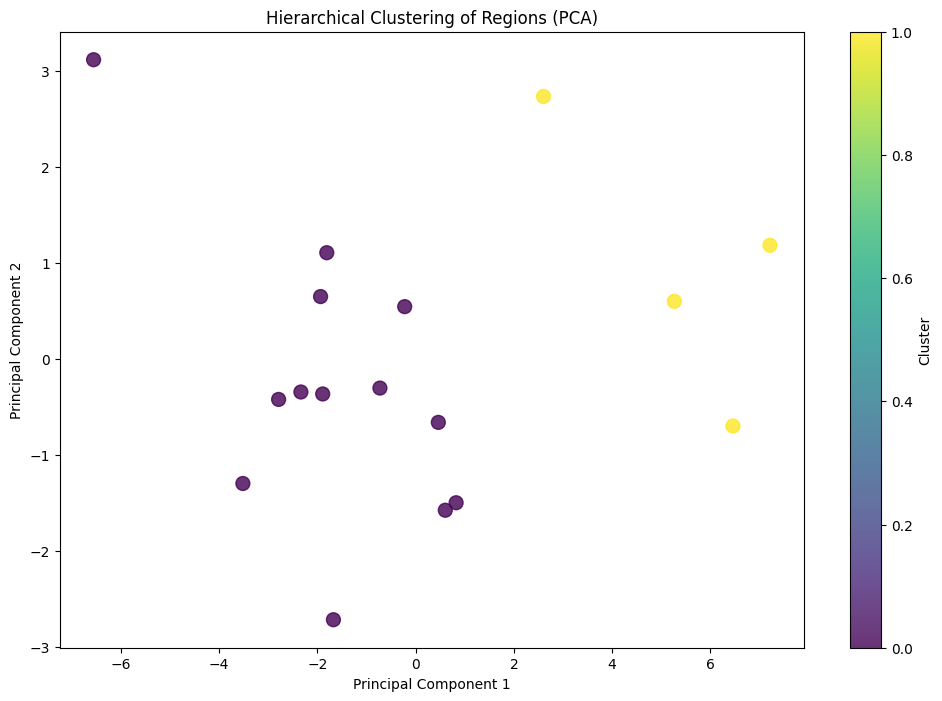

In [157]:
# Visualize clusters (2D PCA plot)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='viridis', s=100, alpha=0.8)
plt.title('Hierarchical Clustering of Regions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')

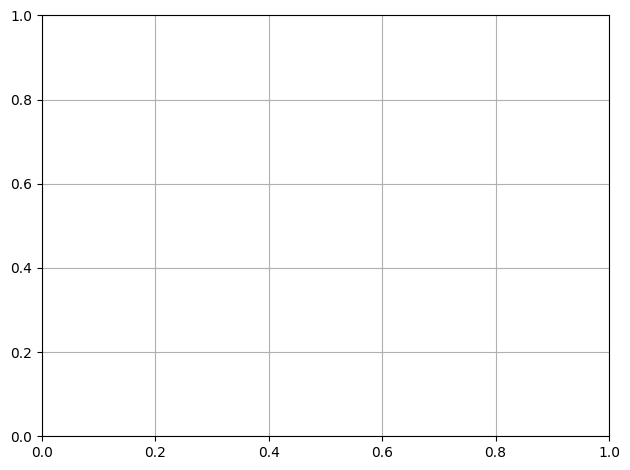

In [158]:
# Add region labels to the plot
for i, region in enumerate(regions):
    plt.annotate(region, (X_pca[i, 0], X_pca[i, 1]), fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

In [159]:
# Display regions in each cluster
for cluster in range(optimal_clusters):
    cluster_regions = region_data[region_data['Cluster'] == cluster]['Region'].values
    print(f"\nCluster {cluster} Regions:")
    print(', '.join(cluster_regions))


Cluster 0 Regions:
 ARMM, Caraga, I - Ilocos Region, II - Cagayan Valley, IVB - MIMAROPA, IX - Zasmboanga Peninsula, V - Bicol Region, VI - Western Visayas, VII - Central Visayas, VIII - Eastern Visayas, X - Northern Mindanao, XI - Davao Region, XII - SOCCSKSARGEN

Cluster 1 Regions:
CAR, III - Central Luzon, IVA - CALABARZON, NCR


In [160]:
# Calculate mean values for key variables by cluster
key_variables = ['Total Household Income', 'Total Food Expenditure',
                 'Housing and water Expenditure', 'Education Expenditure',
                 'Transportation Expenditure', 'Medical Care Expenditure']

cluster_profiles = region_data.groupby('Cluster')[key_variables].mean()
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)


Cluster Profiles (Mean Values):
         Total Household Income  Total Food Expenditure  \
Cluster                                                   
0                 206739.973449            73943.307022   
1                 290718.844820            92595.853061   

         Housing and water Expenditure  Education Expenditure  \
Cluster                                                         
0                         27375.981991            6129.026230   
1                         48470.103522            9262.299809   

         Transportation Expenditure  Medical Care Expenditure  
Cluster                                                        
0                       8837.911223               5762.614882  
1                      13593.303611               9974.474762  


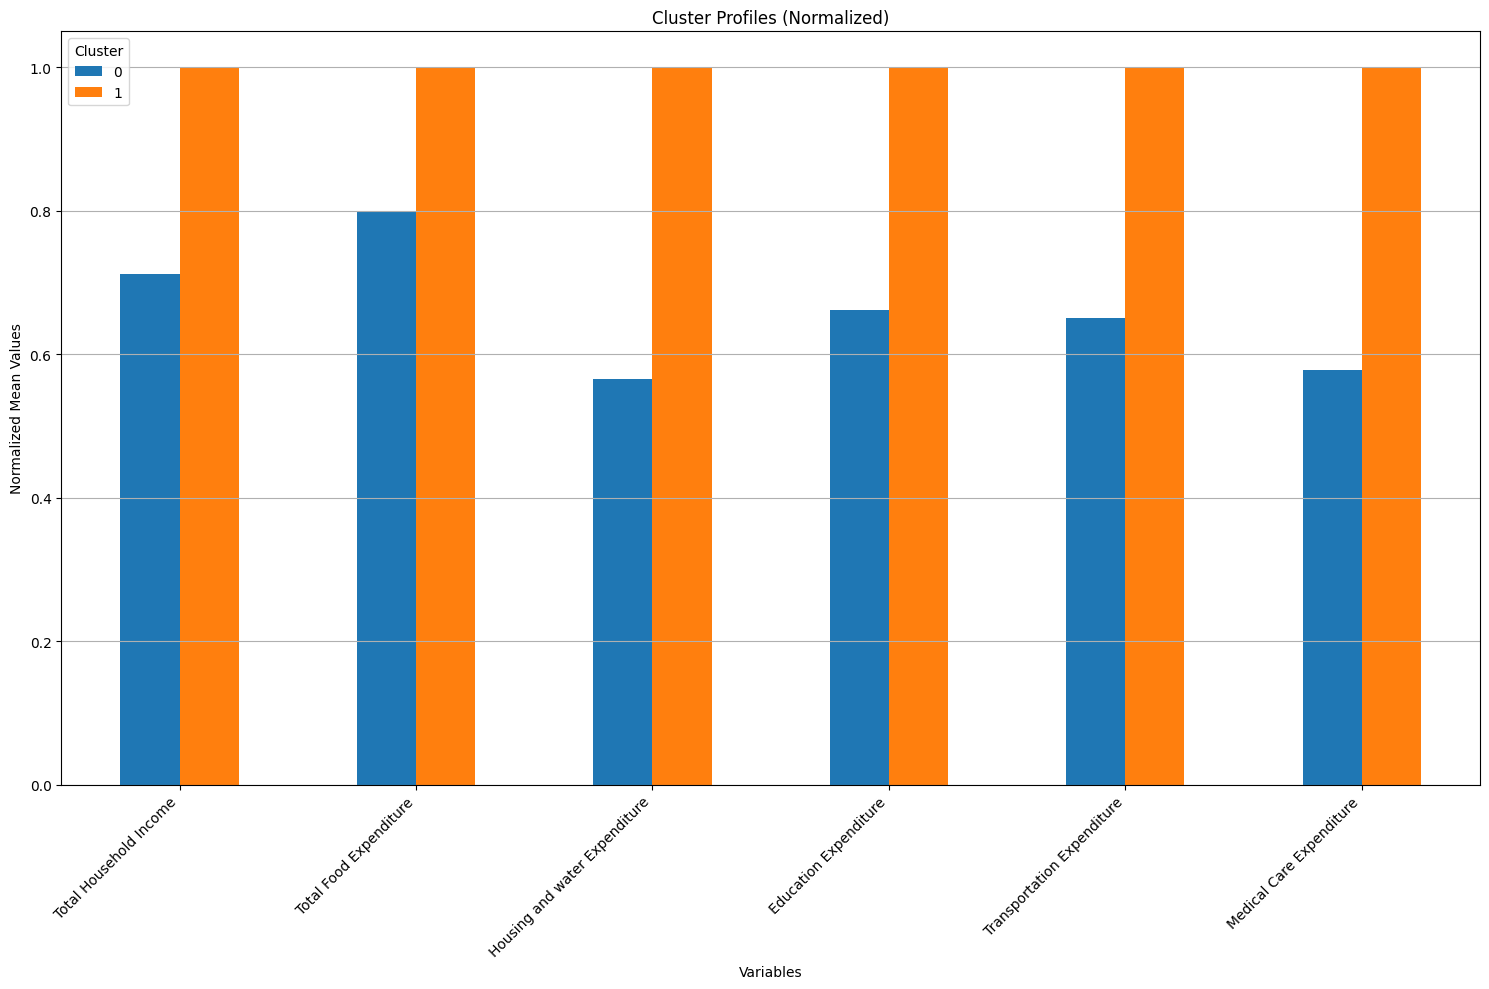

In [161]:
# Visualize cluster profiles
plt.figure(figsize=(15, 10))
cluster_profiles_normalized = cluster_profiles.div(cluster_profiles.max())
cluster_profiles_normalized.T.plot(kind='bar', ax=plt.gca())
plt.title('Cluster Profiles (Normalized)')
plt.xlabel('Variables')
plt.ylabel('Normalized Mean Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [162]:
# Radar chart for cluster profiles
def radar_chart(df, title):
    categories = df.index
    n_categories = len(categories)

    angles = np.linspace(0, 2*np.pi, n_categories, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for i, cluster in enumerate(df.columns):
        values = df[cluster].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(title, size=15, pad=20)
    plt.legend(loc='upper right')
    plt.show()

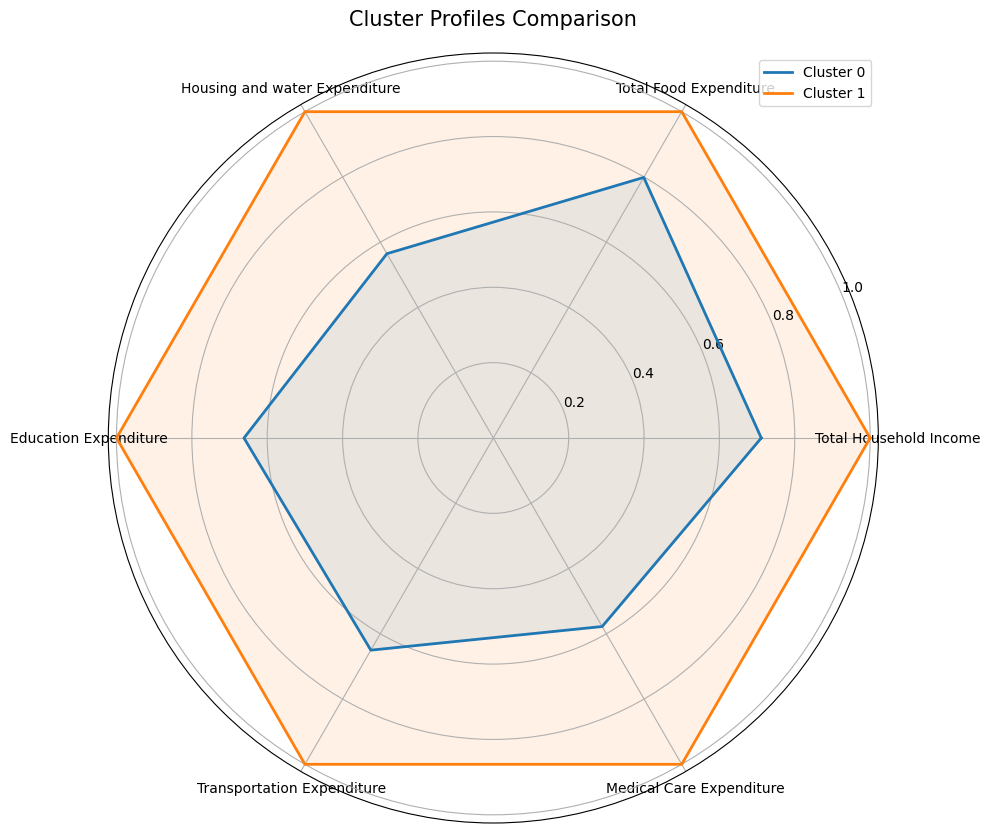

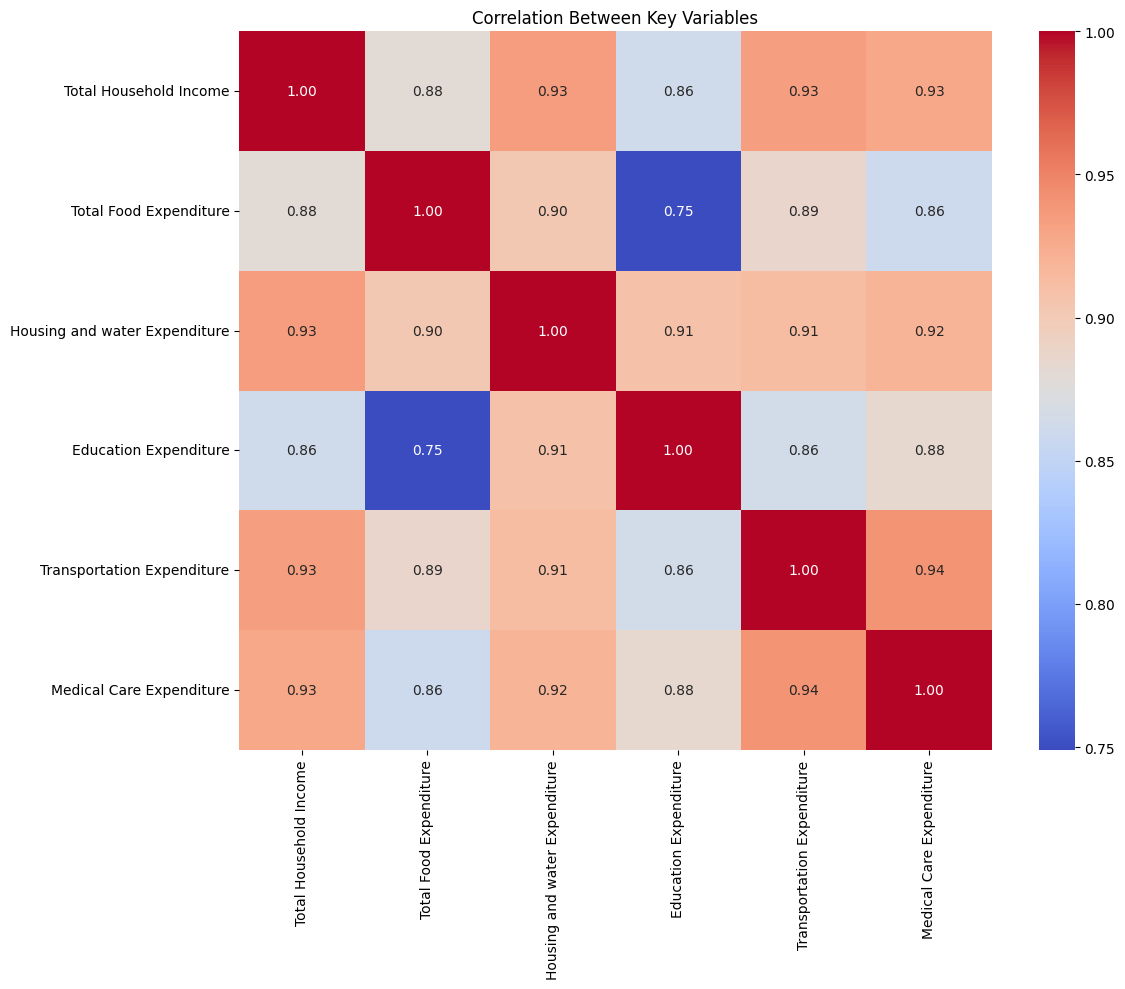

In [163]:
# Prepare data for radar chart
cluster_profiles_radar = cluster_profiles_normalized.T
radar_chart(cluster_profiles_radar, 'Cluster Profiles Comparison')

# Correlation between key variables
plt.figure(figsize=(12, 10))
correlation = region_data[key_variables].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Variables')
plt.tight_layout()
plt.show()

In [164]:
# Display final results for the research question
print("\n===== FINDINGS FOR RESEARCH QUESTION =====")
print("Research Question: How do income and expenditure patterns among Filipino households reflect socioeconomic disparities, and what insights can inform targeted financial and policy interventions?")
print(f"\nWe identified {optimal_clusters} distinct clusters of regions with similar socioeconomic characteristics:")

for cluster in range(optimal_clusters):
    regions_in_cluster = region_data[region_data['Cluster'] == cluster]['Region'].values
    print(f"\nCluster {cluster}:")
    print(f"Regions: {', '.join(regions_in_cluster)}")
    print(f"Average Household Income: ₱{cluster_profiles.loc[cluster, 'Total Household Income']:,.2f}")
    print(f"Key expenditure patterns:")
    print(f"  - Food: ₱{cluster_profiles.loc[cluster, 'Total Food Expenditure']:,.2f}")
    print(f"  - Housing: ₱{cluster_profiles.loc[cluster, 'Housing and water Expenditure']:,.2f}")
    print(f"  - Education: ₱{cluster_profiles.loc[cluster, 'Education Expenditure']:,.2f}")
    print(f"  - Transportation: ₱{cluster_profiles.loc[cluster, 'Transportation Expenditure']:,.2f}")
    print(f"  - Medical Care: ₱{cluster_profiles.loc[cluster, 'Medical Care Expenditure']:,.2f}")

print("\nSilhouette Score:", max(silhouette_scores))
print("\nPolicy Recommendations based on cluster analysis:")
print("1. Higher income clusters may benefit from progressive taxation and luxury goods taxes")
print("2. Lower income clusters may need targeted subsidies for essential expenses like food and housing")
print("3. Regions with low education expenditure may need educational investment and scholarship programs")
print("4. Areas with high medical expenditure could benefit from improved healthcare access and insurance coverage")
print("5. Transportation expenditure disparities suggest need for infrastructure development in certain regions")


===== FINDINGS FOR RESEARCH QUESTION =====
Research Question: How do income and expenditure patterns among Filipino households reflect socioeconomic disparities, and what insights can inform targeted financial and policy interventions?

We identified 2 distinct clusters of regions with similar socioeconomic characteristics:

Cluster 0:
Regions:  ARMM, Caraga, I - Ilocos Region, II - Cagayan Valley, IVB - MIMAROPA, IX - Zasmboanga Peninsula, V - Bicol Region, VI - Western Visayas, VII - Central Visayas, VIII - Eastern Visayas, X - Northern Mindanao, XI - Davao Region, XII - SOCCSKSARGEN
Average Household Income: ₱206,739.97
Key expenditure patterns:
  - Food: ₱73,943.31
  - Housing: ₱27,375.98
  - Education: ₱6,129.03
  - Transportation: ₱8,837.91
  - Medical Care: ₱5,762.61

Cluster 1:
Regions: CAR, III - Central Luzon, IVA - CALABARZON, NCR
Average Household Income: ₱290,718.84
Key expenditure patterns:
  - Food: ₱92,595.85
  - Housing: ₱48,470.10
  - Education: ₱9,262.30
  - Transpo